# Haonan Xu 7748987436

In [1]:
# installations
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=f8341134041c6242abee4d036f4e08fda5551702627ed7b4dbd247f1afc4e8cc
  Stored in directory: /Users/haonanxu/Library/Caches/pip/wheels/f8/7f/03/05e24ae9c42b7583b5b4c458f6b0d53d23c2481e31b30a2fef
Successfully built bootstrapped


In [2]:
# imports
import os
import pandas as pd
import glob
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Homework 3

## (b)

### Preprocessing datasets

In [3]:
# glob() fuctions to recursively maintain a [list] of datasets from different folders
# Ref: https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
datasets = glob.glob("../data/AReM/*/*.csv")
len(datasets)

88

In [4]:
# make two lists for train and test (not sure if it should be in this way, but will see)
test_data1 = glob.glob("../data/AReM/bending?/dataset[1-2].csv")
test_data2 = glob.glob("../data/AReM/*ing/dataset[1-3].csv")
test_data_path = test_data1+test_data2
# check for its components
len(test_data_path)

19

In [5]:
train_data_path = [d for d in datasets if d not in test_data_path]
# check for its components
len(train_data_path)

69

In [6]:
# walk through all datasets and see if any manual changes needs to be made.
for d in datasets:
    try:
        #print(d)
        #print(pd.read_csv(r''+d, skiprows=4))
        pd.read_csv(r''+d, skiprows=4)
    except:
        print(d, "something wrong")

In [7]:
# A record for files that had been manually fixed
# bending2\\dataset4.csv
# cycling\\dataset14.csv
# cycling\\dataset9.csv

#pd.read_csv("C:\\Users\\haona\\Desktop\\552\\hw3\\AReM\\bending2\\dataset4.csv", skiprows=4)

## (c)

### (i) Time-domain features used in time series classification: Means, Standard deviations, Skewness, Kurtosis, Maximum and Minimum values, Frequencies, k-quantiles, etc.

### (ii)

In [8]:
# Ref statistical features: https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html
# Ref switch cols and rows: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
# Ref change the order of columns: https://erikrood.com/Python_References/change_order_dataframe_columns_final.html
# Ref change and delete old index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index

# A function to reshape data as needed 
def form_data(dataset, cols):
    tdf = pd.read_csv(dataset, skiprows=4, usecols=[1,2,3,4,5,6])
    tdf = tdf.describe().transpose().drop(columns=['count'])[['min','max','mean','50%','std','25%','75%']].reset_index(drop=True)
    #print(tdf)
    rdf = pd.DataFrame(tdf.to_numpy().reshape(1,42))
    #print(rdf)
    rdf.columns=cols
    return rdf

In [9]:
# create columns for the new dataset
temp_name = []
col_names = []
for i in range(0,6):
    temp_name.append(['min'+str(i+1),'max'+str(i+1),'mean'+str(i+1),'median'+str(i+1),'std'+str(i+1),'1st quart'+str(i+1),'3rd quart'+str(i+1)])
    col_names = col_names + temp_name[i]    
#len(col_names)

In [10]:
# create new dataset with all datasets
# Ref df concat: https://stackoverflow.com/questions/39534676/typeerror-first-argument-must-be-an-iterable-of-pandas-objects-you-passed-an-o/50459002
# Ref change index range: https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi?noredirect=1&lq=1
df = pd.DataFrame()
for d in datasets:
    temp_df = form_data(d, col_names)
    df = pd.concat([df, temp_df])
    
df = df.reset_index(drop=True)
df.index = np.arange(1,len(df)+1)
df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
1,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.8300
2,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
3,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
85,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
86,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
87,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


In [11]:
# same practice needs to be done with train and test for future convenience
df_train = pd.DataFrame()
for d in train_data_path:
    temp_df = form_data(d, col_names)
    df_train = pd.concat([df_train, temp_df])
    
df_train = df_train.reset_index(drop=True)
df_train.index = np.arange(1,len(df_train)+1)
df_train

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
1,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.8300
2,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
3,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
66,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
67,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
68,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


In [12]:
df_test = pd.DataFrame()
for d in test_data_path:
    temp_df = form_data(d, col_names)
    df_test = pd.concat([df_test, temp_df])
    
df_test = df_test.reset_index(drop=True)
df_test.index = np.arange(1,len(df_test)+1)
df_test

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300
2,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300
3,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870
4,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300
5,19.33,43.50,34.227771,35.500,4.889576,30.5000,37.7500,0.0,14.50,3.995729,...,3.092094,14.7500,18.6700,0.0,9.74,3.394125,3.100,1.792090,2.1050,4.425
6,12.50,45.00,33.509729,34.125,4.850923,30.5000,36.7500,0.0,13.05,4.450771,...,3.133564,14.6275,18.7500,0.0,8.96,3.378479,3.085,1.787360,2.0600,4.440
7,15.00,46.75,34.660583,35.000,5.315110,31.0000,38.2500,0.0,13.44,4.200896,...,3.155015,14.2500,18.5000,0.0,8.99,3.244396,3.000,1.630983,2.1200,4.240
8,33.33,48.00,44.334729,45.000,2.476940,42.2500,46.5000,0.0,3.90,0.432958,...,5.401794,9.3300,17.7500,0.0,5.02,0.933000,0.830,0.673609,0.4700,1.250
9,35.50,46.25,43.174938,43.670,1.989052,42.5000,44.5000,0.0,2.12,0.506583,...,2.983976,12.7500,16.5000,0.0,5.72,0.911979,0.830,0.666161,0.4700,1.220
10,32.75,47.00,42.760563,44.500,3.398919,41.3300,45.3725,0.0,3.34,0.486167,...,4.296574,13.0000,18.5650,0.0,5.73,0.842271,0.710,0.722165,0.4300,1.090


In [13]:
# coming back from (d) for some additional information to be prepared
# Ref: https://stackoverflow.com/questions/14849293/python-find-index-position-in-list-based-of-partial-string
# Find which row should label bending in train set
bending_index = [i for i, s in enumerate(train_data_path) if 'bending' in s]
bending_index

[0, 1, 2, 3, 4, 17, 18, 19, 20]

In [14]:
# Find which row should label bending in test set
bending_index2 = [i for i, s in enumerate(test_data_path) if 'bending' in s]
bending_index2

[0, 1, 2, 3]

### (iii)

In [15]:
fea_std = df.std(ddof=0).to_numpy()
fea_std

array([9.51544507, 4.36932238, 5.30531446, 5.40905643, 1.76205558,
       6.11852625, 5.10964275, 0.        , 5.03388168, 1.56519425,
       1.40419712, 0.8790678 , 0.94099363, 2.11315653, 2.93961598,
       4.84735791, 3.98554017, 4.01339672, 0.94131586, 4.19660836,
       4.14785807, 0.        , 2.17118307, 1.15946951, 1.13905805,
       0.45563061, 0.8388127 , 1.54365793, 6.08910655, 5.70852443,
       5.64325338, 5.7806552 , 1.01905798, 6.06172723, 5.50020019,
       0.04557697, 2.50456803, 1.14823175, 1.08028354, 0.51466806,
       0.75426137, 1.51491758])

In [16]:
# Ref python bootstrapped: https://pypi.org/project/bootstrapped/
# Bootstrapped parameters: https://github.com/facebookincubator/bootstrapped/blob/master/bootstrapped/bootstrap.py
std_bootstrap_CI = []
for i in range(0,42):
    interv = bs.bootstrap(df.iloc[:,i].to_numpy(), stat_func=bs_stats.std, alpha=0.1)
    std_bootstrap_CI.append(interv)
    
std_ci_df = pd.DataFrame(std_bootstrap_CI)
std_ci_df.index=col_names
std_ci_df.columns=['std & CI']
pd.set_option('display.max_colwidth', None)
print(std_ci_df)

                                                                      std & CI
min1                9.515445066931843    (8.30023710063864, 10.79821618217271)
max1                4.36932238296287    (3.4785004319601835, 5.43362490550274)
mean1             5.305314461239687    (4.7666276264840475, 5.935447107473965)
median1            5.409056425357996    (4.857796143561779, 6.042431516430794)
std1             1.7620555751491025    (1.581716463168831, 1.9623099090078644)
1st quart1         6.118526249454473    (5.623015832606514, 6.692961549588161)
3rd quart1        5.109642753365408    (4.413406770101069, 5.9104366362764145)
min2                                                         0.0    (0.0, 0.0)
max2                5.033881679163114    (4.694963829184102, 5.47072737485478)
mean2            1.565194252074566    (1.4335065529370858, 1.7407283521463026)
median2         1.4041971241720508    (1.2721414402199096, 1.5784313545457918)
std2            0.8790677991268445    (0.82238769385

### (iv)

#### min, mean, and max

## (d)

### (i)

In [17]:
# add labels to train dataset
labels = []
for k in range(0,69):
    if k in bending_index:
        labels.append(1)
    else:
        labels.append(0)
df_train['others vs bending'] = labels
df_train

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,others vs bending
1,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.8300,1
2,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700,1
3,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000,1
4,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000,1
5,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.00,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600,0
66,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000,0
67,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175,0
68,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300,0


In [18]:
features=['min1','max1','mean1','min2','max2','mean2','min6','max6','mean6']

<ipython-input-19-0c8aeb804276>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


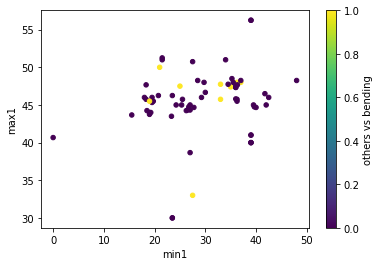

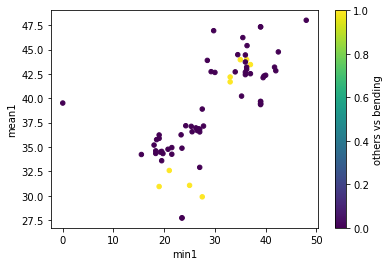

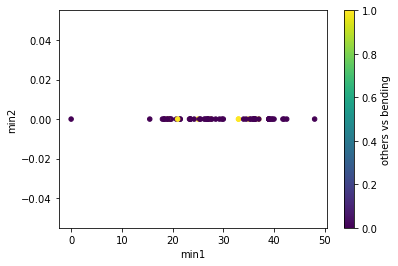

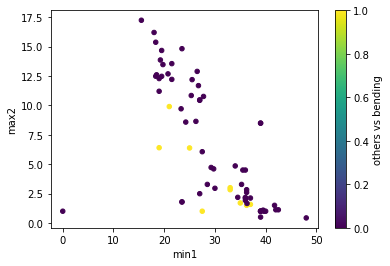

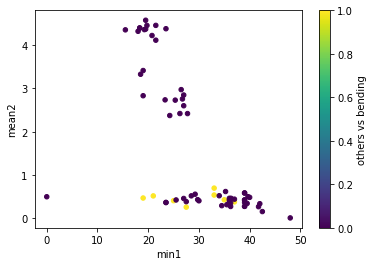

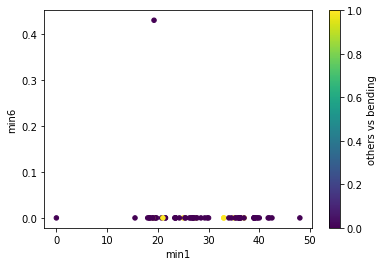

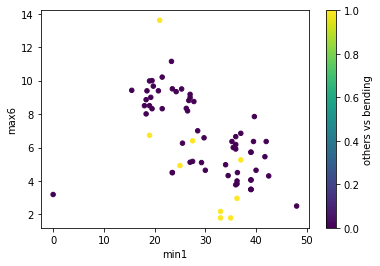

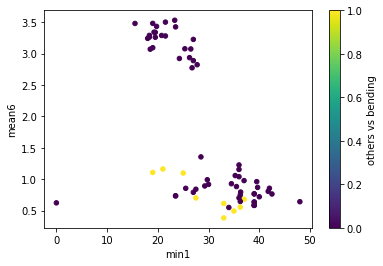

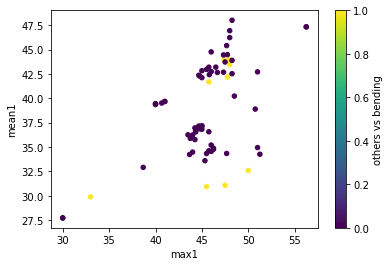

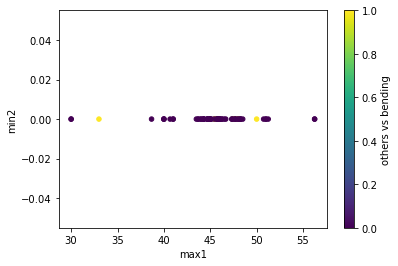

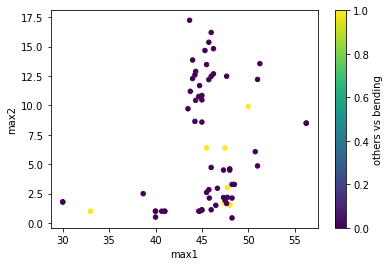

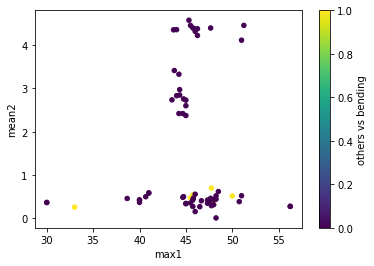

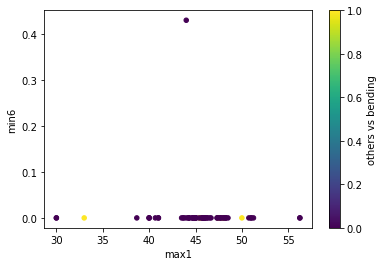

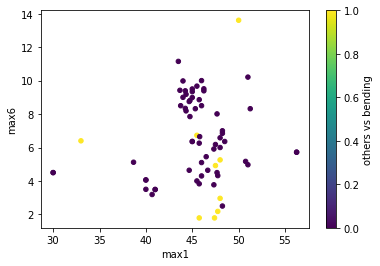

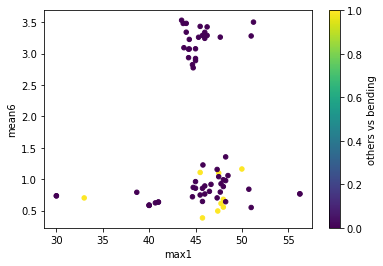

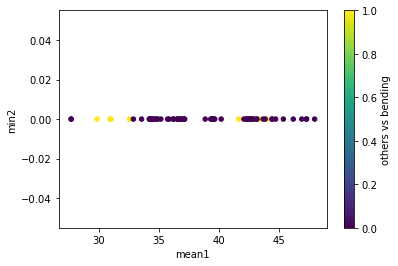

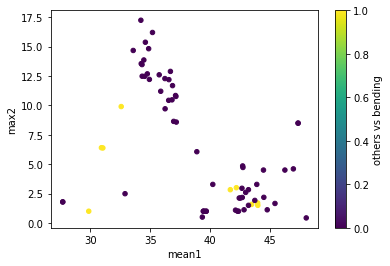

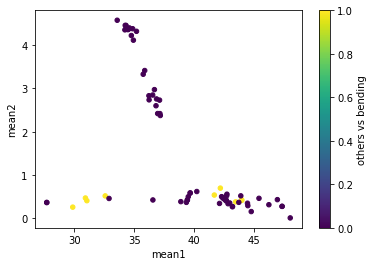

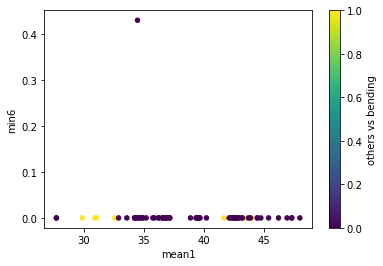

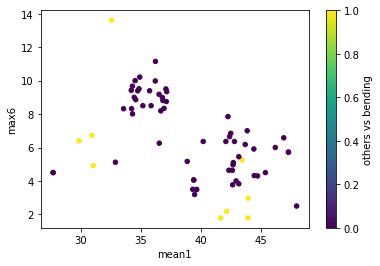

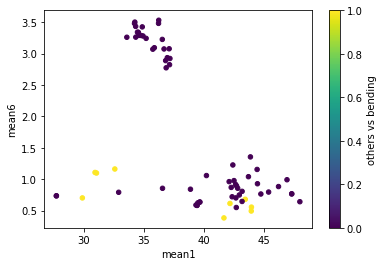

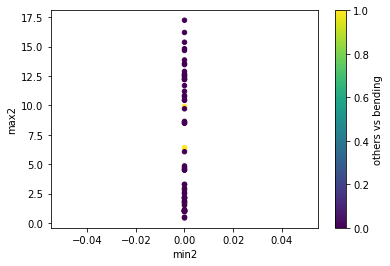

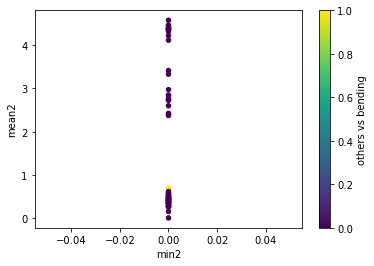

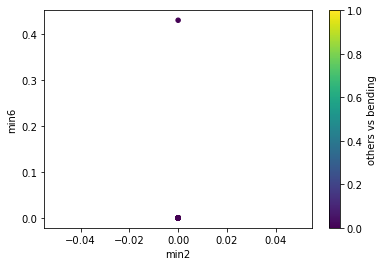

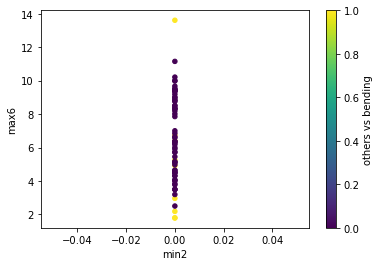

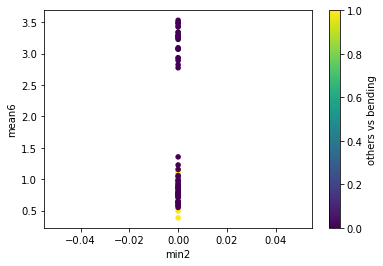

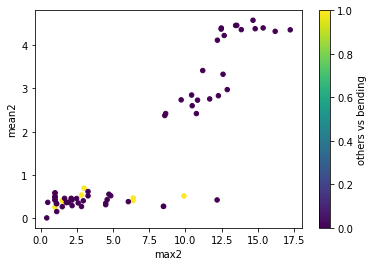

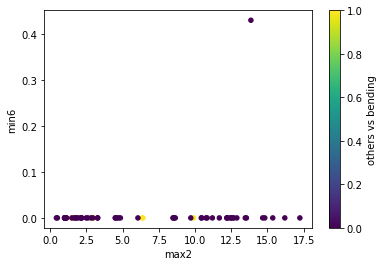

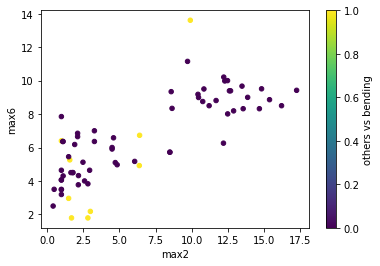

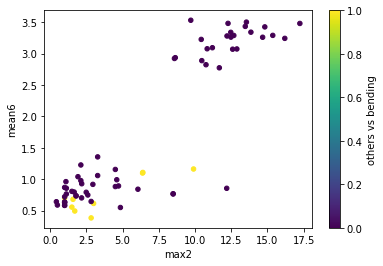

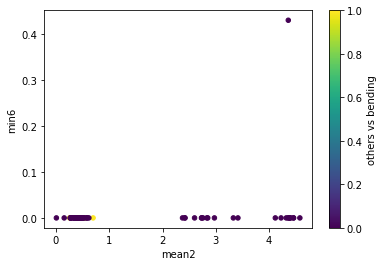

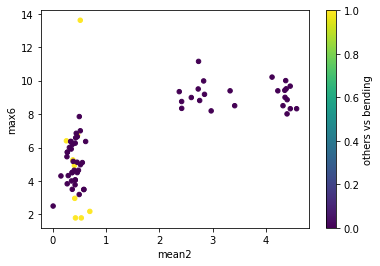

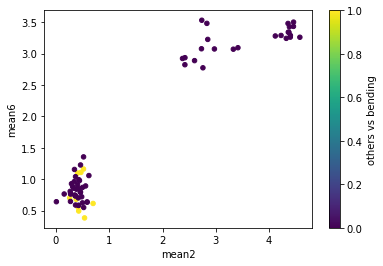

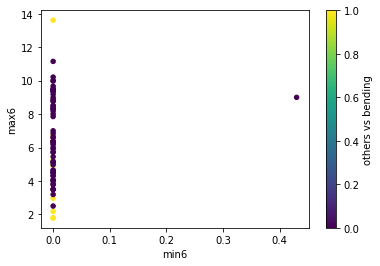

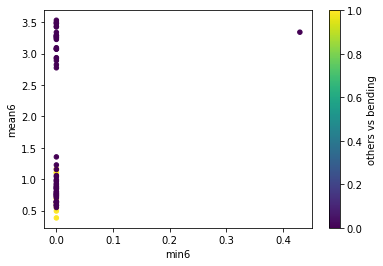

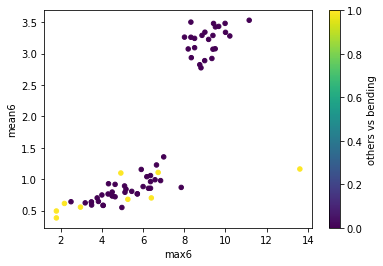

In [19]:
for i in range(0,9):
    for j in range(i+1,9):
        x = features[i]
        y = features[j]
        fig, ax = plt.subplots()
        df_train.plot(kind='scatter', x=x, y=y, s=20, c='others vs bending', cmap='viridis', ax=ax)

### (ii)

In [20]:
# function adapted from above
def form_break_data(dataset, cols1, cols2):
    tdf = pd.read_csv(dataset, skiprows=4, nrows=240, usecols=[1,2,3,4,5,6])
    tdf = tdf.describe().transpose().drop(columns=['count','50%','std','25%','75%'])[['min','max','mean']].reset_index(drop=True)
    rdf = pd.DataFrame(tdf.to_numpy().reshape(1,18))
    rdf.columns=cols1
    tdf = pd.read_csv(dataset, skiprows=244, usecols=[1,2,3,4,5,6])
    tdf = tdf.describe().transpose().drop(columns=['count','50%','std','25%','75%'])[['min','max','mean']].reset_index(drop=True)
    sdf = pd.DataFrame(tdf.to_numpy().reshape(1,18))
    sdf.columns = cols2
    
    ccdf = pd.concat([rdf, sdf], axis=1, sort=False)
    
    return ccdf

In [21]:
temp_name = []
col_names1 = []
for i in range(0,6):
    temp_name.append(['min'+str(i+1),'max'+str(i+1),'mean'+str(i+1)])
    col_names1 = col_names1 + temp_name[i]
    
#col_names1

In [22]:
temp_name = []
col_names2 = []
for i in range(0,6):
    temp_name.append(['min'+str(i+1+6),'max'+str(i+1+6),'mean'+str(i+1+6)])
    col_names2 = col_names2 + temp_name[i]
    
#col_names2

In [23]:
df_train_half = pd.DataFrame()
for d in train_data_path:
    temp_df = form_break_data(d, col_names1, col_names2)
    df_train_half = pd.concat([df_train_half, temp_df])
    
df_train_half = df_train_half.reset_index(drop=True)
df_train_half.index = np.arange(1,len(df_train_half)+1)
df_train_half

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,...,mean9,min10,max10,mean10,min11,max11,mean11,min12,max12,mean12
1,36.67,45.00,43.486208,0.0,1.30,0.378667,4.00,26.33,16.397250,0.0,...,15.338792,0.0,3.56,0.669750,13.75,26.00,21.882042,0.0,2.96,0.585750
2,39.00,48.00,44.117042,0.0,1.30,0.250042,6.25,27.00,17.744167,0.0,...,13.842500,0.0,5.21,0.575708,8.00,26.00,22.850875,0.0,4.06,0.543875
3,33.75,47.75,43.278875,0.0,3.00,0.673292,11.00,30.00,23.141250,0.0,...,21.226000,0.0,5.15,1.171792,20.00,38.50,30.965708,0.0,2.18,0.586083
4,33.00,45.75,41.621208,0.0,2.83,0.623083,3.00,28.25,19.081458,0.0,...,18.931667,0.0,2.35,0.568667,26.00,36.00,29.635833,0.0,1.50,0.347500
5,36.50,46.50,44.057167,0.0,1.50,0.381042,14.25,29.25,23.096792,0.0,...,21.147917,0.0,4.44,0.501167,29.00,38.25,34.883375,0.0,1.50,0.388333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,20.00,44.25,35.692167,0.0,11.39,3.324208,5.00,27.00,16.010708,0.0,...,16.099333,0.0,8.96,2.889375,7.00,24.33,16.130417,0.0,8.81,2.966917
66,24.25,45.00,36.954208,0.0,8.18,2.392667,5.50,26.75,17.121542,0.0,...,15.940625,0.0,7.83,2.826125,11.75,24.50,19.643917,0.0,9.34,2.838083
67,27.00,42.67,36.342750,0.0,9.71,2.691917,9.50,28.00,18.578875,0.0,...,18.292542,0.0,8.55,3.219125,8.00,26.67,18.685417,0.0,11.15,3.513250
68,26.25,43.40,36.865417,0.0,7.46,2.387250,7.00,26.50,15.117208,0.0,...,15.509625,0.0,8.06,2.761833,2.00,21.25,16.140708,0.0,8.34,2.904458


In [24]:
# add labels to the new train dataset
labels = []
for k in range(0,69):
    if k in bending_index:
        labels.append(1)
    else:
        labels.append(0)
df_train_half['others vs bending'] = labels
df_train_half

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,...,min10,max10,mean10,min11,max11,mean11,min12,max12,mean12,others vs bending
1,36.67,45.00,43.486208,0.0,1.30,0.378667,4.00,26.33,16.397250,0.0,...,0.0,3.56,0.669750,13.75,26.00,21.882042,0.0,2.96,0.585750,1
2,39.00,48.00,44.117042,0.0,1.30,0.250042,6.25,27.00,17.744167,0.0,...,0.0,5.21,0.575708,8.00,26.00,22.850875,0.0,4.06,0.543875,1
3,33.75,47.75,43.278875,0.0,3.00,0.673292,11.00,30.00,23.141250,0.0,...,0.0,5.15,1.171792,20.00,38.50,30.965708,0.0,2.18,0.586083,1
4,33.00,45.75,41.621208,0.0,2.83,0.623083,3.00,28.25,19.081458,0.0,...,0.0,2.35,0.568667,26.00,36.00,29.635833,0.0,1.50,0.347500,1
5,36.50,46.50,44.057167,0.0,1.50,0.381042,14.25,29.25,23.096792,0.0,...,0.0,4.44,0.501167,29.00,38.25,34.883375,0.0,1.50,0.388333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,20.00,44.25,35.692167,0.0,11.39,3.324208,5.00,27.00,16.010708,0.0,...,0.0,8.96,2.889375,7.00,24.33,16.130417,0.0,8.81,2.966917,0
66,24.25,45.00,36.954208,0.0,8.18,2.392667,5.50,26.75,17.121542,0.0,...,0.0,7.83,2.826125,11.75,24.50,19.643917,0.0,9.34,2.838083,0
67,27.00,42.67,36.342750,0.0,9.71,2.691917,9.50,28.00,18.578875,0.0,...,0.0,8.55,3.219125,8.00,26.67,18.685417,0.0,11.15,3.513250,0
68,26.25,43.40,36.865417,0.0,7.46,2.387250,7.00,26.50,15.117208,0.0,...,0.0,8.06,2.761833,2.00,21.25,16.140708,0.0,8.34,2.904458,0


In [25]:
features=['min1','max1','mean1','min2','max2','mean2','min12','max12','mean12']

<ipython-input-26-820e8daa8be5>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


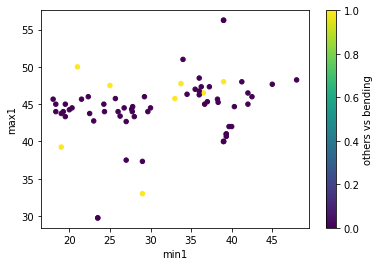

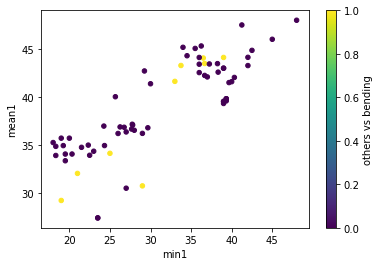

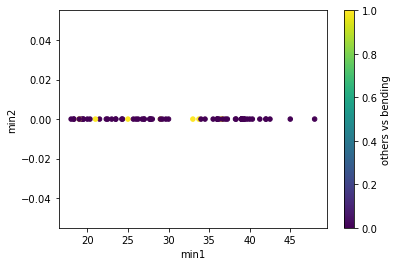

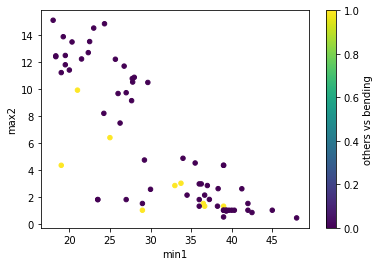

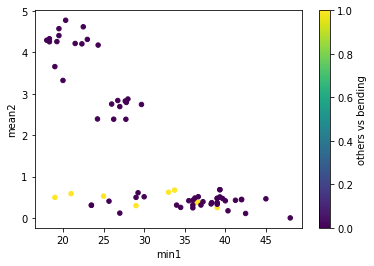

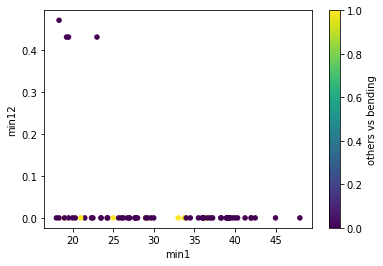

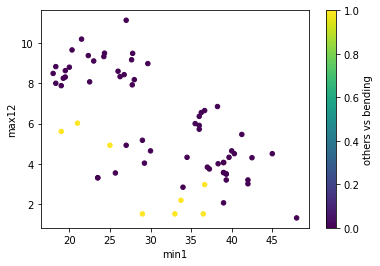

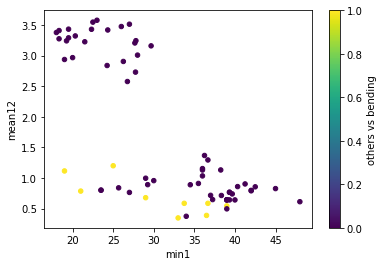

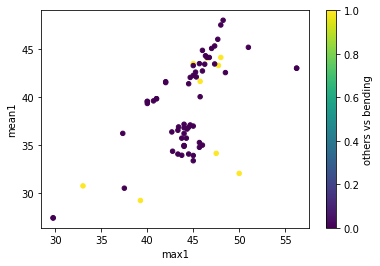

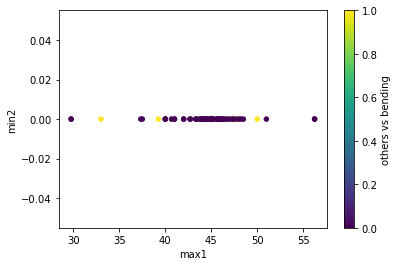

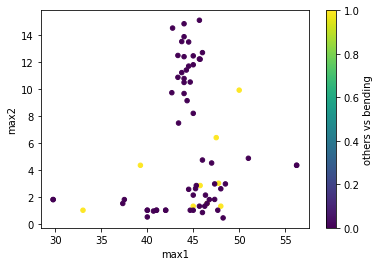

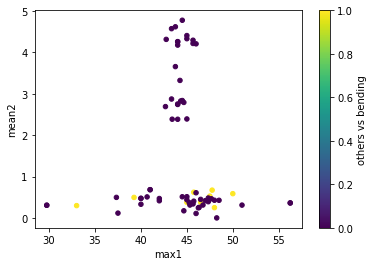

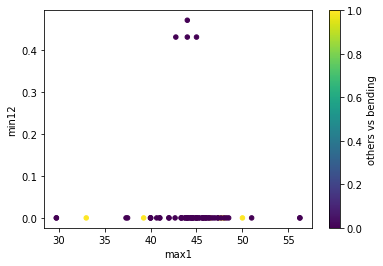

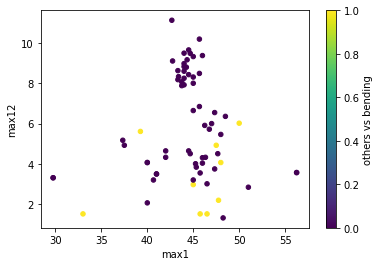

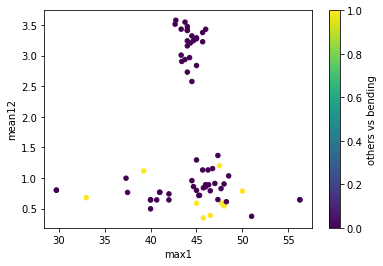

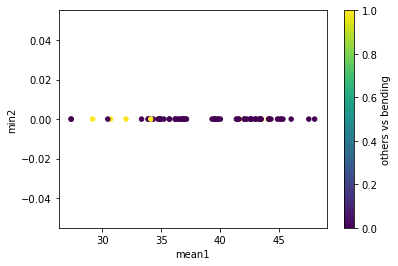

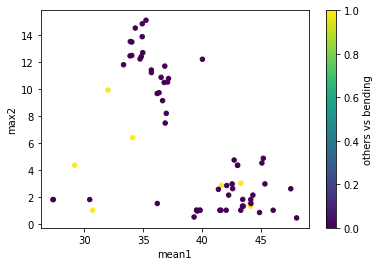

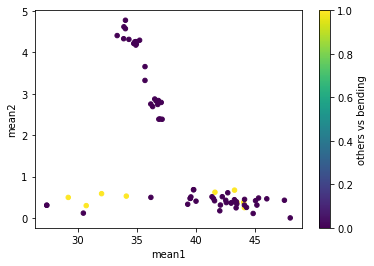

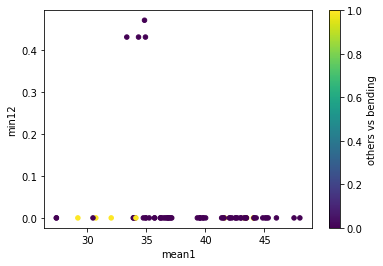

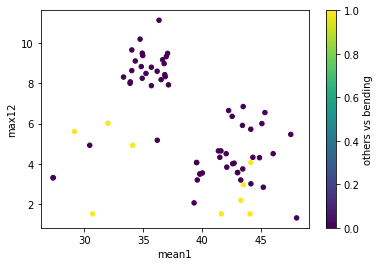

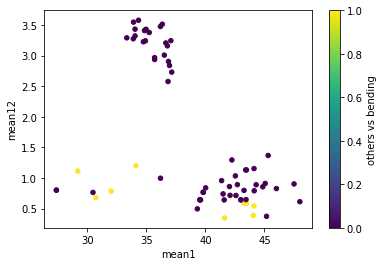

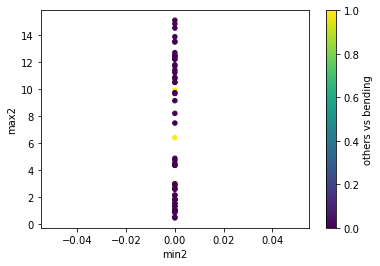

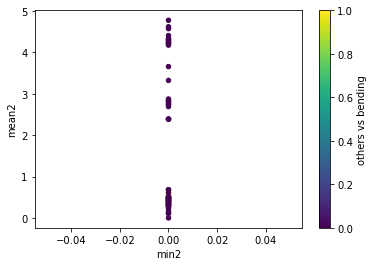

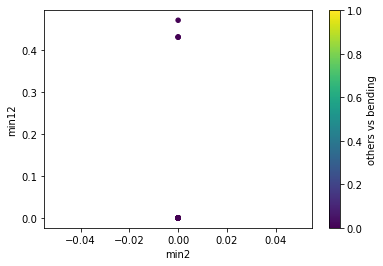

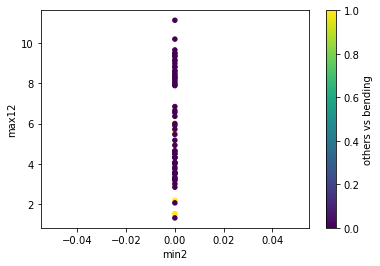

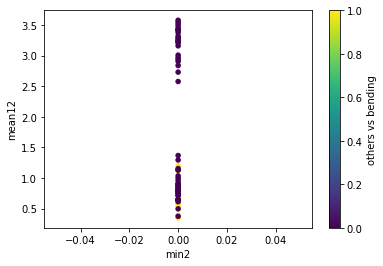

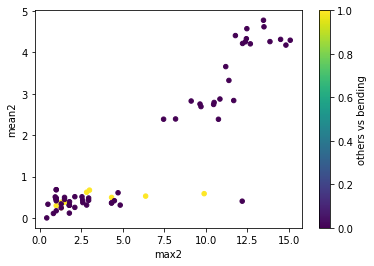

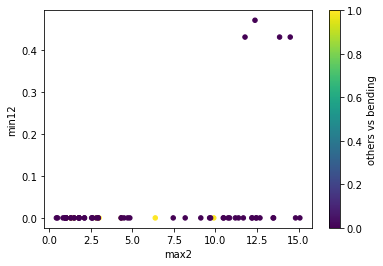

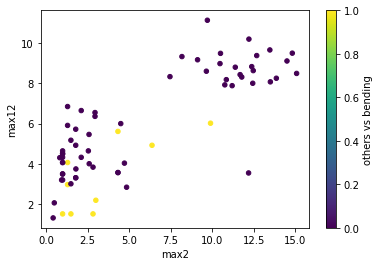

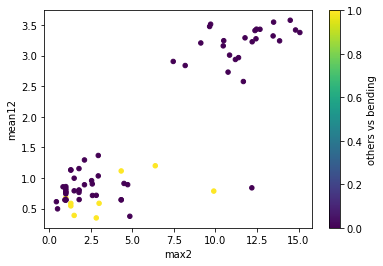

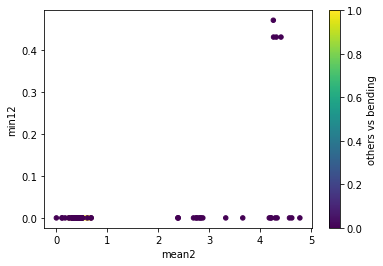

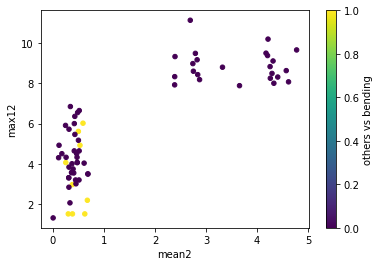

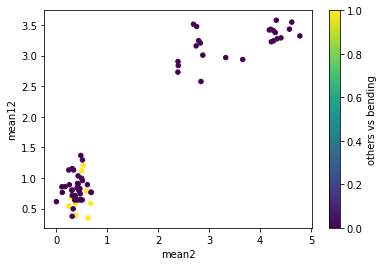

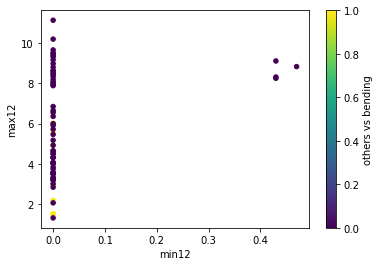

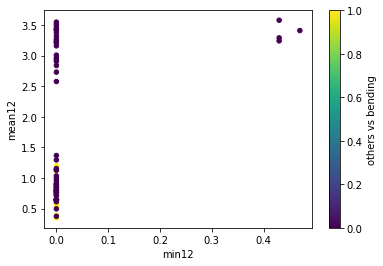

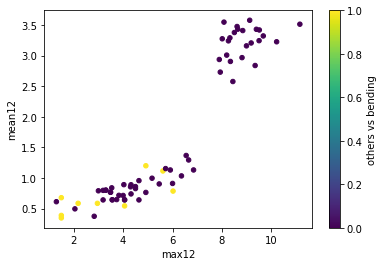

In [26]:
for i in range(0,9):
    for j in range(i+1,9):
        x = features[i]
        y = features[j]
        fig, ax = plt.subplots()
        df_train_half.plot(kind='scatter', x=x, y=y, s=20, c='others vs bending', cmap='viridis', ax=ax)

There's no significant difference before and after slicing data.

### (iii)

In [27]:
# generating column names for the sliced datasets
def colnames_generator(l_slices):
    col_names = []
    for k in range(0,l_slices):
        temp_name = []
        for i in range(0,6):
            temp_name.append(['min'+str(i+1+6*k),'max'+str(i+1+6*k),'mean'+str(i+1+6*k)])
            col_names = col_names + temp_name[i]
    return col_names

In [28]:
# psuedo code for data slicing function
#
###############################################################
# params:
# dataset.csv : instance contains time series data
# l : how many slice
# colnames : column names (need another function to generate)
#
# Returns:
# A Dataframe with size 69*(18*l)
###############################################################
#
# Read recursively, slice by slice, floor(480/l) rows a time
#     e.g. l=2, read first 240 rows and then second 240 rows
# Reshape to a 1*(3*6) df
# Concat to a 1*(3*6*l) df
# Return
###############################################################
def data_slicer(dataset, l_slices, col_names):
    row_num = 480//l_slices
    ccdf = pd.DataFrame()
    for j in range(0,l_slices):
        tdf = pd.read_csv(dataset, skiprows=4+row_num*j, nrows=row_num, usecols=[1,2,3,4,5,6])
        tdf = tdf.describe().transpose().drop(columns=['count','50%','std','25%','75%'])[['min','max','mean']].reset_index(drop=True)
        rdf = pd.DataFrame(tdf.to_numpy().reshape(1,18))
        ccdf = pd.concat([ccdf, rdf], axis=1, sort=False)
    ccdf.columns = col_names

    return ccdf

In [29]:
# add labels to the new train dataset
def binary_train_labels(df1):
    labels = []
    for k in range(0,69):
        if k in bending_index:
            labels.append(1)
        else:
            labels.append(0)
    df1['others vs bending'] = labels
    return df1

In [30]:
# add labels to the test datasets
def binary_test_labels(df2):
    labels = []
    for k in range(0,19):
        if k in bending_index2:
            labels.append(1)
        else:
            labels.append(0)
    df2['others vs bending'] = labels
    return df2

In [31]:
# l = {1,2,...,20}
# store rfe models 'r' and train sets 'df_train_sliced' for future reference
# Use RFECV for feature selection
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
results = []
train_sliced = []
for l in range(1,21):
    print("Running l = "+str(l)+" case")
    cn = colnames_generator(l)
    df_train_sliced = pd.DataFrame()
    for d in train_data_path:
        temp_df = data_slicer(d,l,cn)
        df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
    df_train_sliced = df_train_sliced.reset_index(drop=True)
    df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
    df_train_sliced = binary_train_labels(df_train_sliced)

    x_train = df_train_sliced.iloc[:,:-1]
    y_train = df_train_sliced.iloc[:,-1]
    
    model = LogisticRegression(C=100000) # c to infinity
    rfe = RFECV(model, cv=5)
    r = rfe.fit(x_train, y_train)
    
    train_sliced.append(df_train_sliced)
    results.append(r)
    

Running l = 1 case
Running l = 2 case
Running l = 3 case
Running l = 4 case
Running l = 5 case
Running l = 6 case
Running l = 7 case
Running l = 8 case
Running l = 9 case
Running l = 10 case
Running l = 11 case
Running l = 12 case
Running l = 13 case
Running l = 14 case
Running l = 15 case
Running l = 16 case
Running l = 17 case
Running l = 18 case
Running l = 19 case
Running l = 20 case


In [50]:
# Ref RFECV: https://www.youtube.com/watch?v=xlHk4okO8Ls
# 
# selecting l with highest cv scores
for i in range(0,20):
    print("l="+str(i+1)+", the highest cv score is: ",np.mean(results[i].grid_scores_))

l=1, the highest cv score is:  0.9641025641025642
l=2, the highest cv score is:  0.9507020757020754
l=3, the highest cv score is:  0.9608465608465614
l=4, the highest cv score is:  0.9454365079365079
l=5, the highest cv score is:  0.9403052503052503
l=6, the highest cv score is:  0.9458791208791206
l=7, the highest cv score is:  0.9493022850165705
l=8, the highest cv score is:  0.9323107448107449
l=9, the highest cv score is:  0.9296160629493962
l=10, the highest cv score is:  0.9467338217338216
l=11, the highest cv score is:  0.9468253968253967
l=12, the highest cv score is:  0.9542328042328043
l=13, the highest cv score is:  0.955006105006105
l=14, the highest cv score is:  0.9505668934240363
l=15, the highest cv score is:  0.9443833943833942
l=16, the highest cv score is:  0.9506448412698414
l=17, the highest cv score is:  0.954668534080299
l=18, the highest cv score is:  0.9565696649029983
l=19, the highest cv score is:  0.9412248570143307
l=20, the highest cv score is:  0.95019536

From above, we can see that when l = 1, the regression has best cv scores.
The correct way to perform cross-validation is performing corss-validation while choosing l. The wrong way is to choose an optimal l, and then performing cross-validation.

### (iv)

In [51]:
# A function to reach back to the l-sliced dataset
# For each l, find out which features are chosen
# drop other features and then refit the model
##################################################
# params:
# l : the value of l
# returns:
# y_pred : the predict result on pruned train data
# y_train_revisit : ground-truth train label
# refit_result : the refitted model
##################################################
def check_back_l(l):
    print("When l="+str(l)+", the number of features p is ", results[l-1].n_features_)
    
    # get train set from stored sliced
    x_train_revisit = train_sliced[l-1].iloc[:,:-1] # _revisit to avoid bug
    y_train_revisit = train_sliced[l-1].iloc[:,-1]

    print("The selected features are: ")
    print(x_train_revisit.columns[results[l-1].support_])
    
    # Refitting
    model = LogisticRegression(C=100000) # c to infinity
    x_train_pruned = results[l-1].transform(x_train_revisit) # pruned train set with selected featrues
    refit_result = model.fit(x_train_pruned, y_train_revisit)
    
    y_pred = refit_result.predict(x_train_pruned)
    #print("predict result: ", y_pred)
    #print("groundtruth:\n", y_test)
    
    return y_pred, y_train_revisit, refit_result
    

In [34]:
y_pred, y_train, _ = check_back_l(1)

When l=1, the number of features p is  11
The selected features are: 
Index(['min1', 'mean1', 'max2', 'mean2', 'mean3', 'mean4', 'min5', 'max5',
       'mean5', 'max6', 'mean6'],
      dtype='object')


In [35]:
print("Confusion Matrix for l=1: ")
confusion_matrix(y_pred, y_train)

Confusion Matrix for l=1: 


array([[60,  0],
       [ 0,  9]])

Since they have the same accuracy, I'll go with l=1 model for future problems.
That is, my best classifier is (l,p) = (1, 6) with Index(['max2', 'min5', 'max5', 'mean5', 'mean7', 'max13', 'min17', 'max18'] chosen.

When l=1, the number of features p is  11
The selected features are: 
Index(['min1', 'mean1', 'max2', 'mean2', 'mean3', 'mean4', 'min5', 'max5',
       'mean5', 'max6', 'mean6'],
      dtype='object')

The AUC score is:  1.0


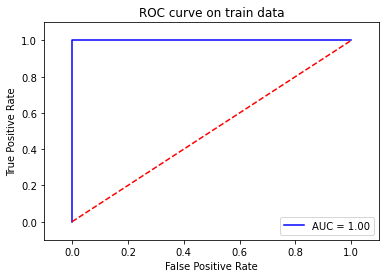

In [52]:
# ROC curve on training data
x_train_best = train_sliced[0].iloc[:,:-1] # _best to avoid bug
y_train_best = train_sliced[0].iloc[:,-1]

# get fitted model at l=1
_, _, rfe = check_back_l(1)
x_train_pruned = results[0].transform(x_train_best) # pruned train set with selected featrues
refit_best = rfe.fit(x_train_pruned, y_train_best)

# Ref y_score for roc curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
y_score = refit_best.predict_proba(x_train_pruned)
y_tscore = y_score[:,1] # y_score has two value, (n_samples , n_classes), we need the second one only for roc
fpr, tpr, t = roc_curve(y_train_best, y_tscore, pos_label=1)

# Get AUC score
roc_auc = auc(fpr, tpr)
print('\nThe AUC score is: ', roc_auc)
# Ref plotting: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
plt.title('ROC curve on train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
# debugging use

#print("Running l = "+str(1)+" case")
#cn = colnames_generator(1)
#df_train_sliced = pd.DataFrame()
#for d in train_data_path:
#    temp_df = data_slicer(d,1,cn)
#    df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
#df_train_sliced = df_train_sliced.reset_index(drop=True)
#df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
#df_train_sliced = binary_train_labels(df_train_sliced)

#x_train = df_train_sliced.iloc[:,:-1]
#y_train = df_train_sliced.iloc[:,-1]
    
#model = LogisticRegression(C=100000) # c to infinity
#rfe = RFECV(model, cv=5)
#r = rfe.fit(x_train, y_train)
    
#train_sliced.append(df_train_sliced)
#results.append(r)

In [42]:
#model = LogisticRegression(C=100000) # c to infinity
#rfe = RFECV(model, cv=5)
#x_train_pruned = r.transform(x_train)
#refit_result = rfe.fit(x_train_pruned, y_train)
#cn = colnames_generator(1)
#df_test_sliced = pd.DataFrame()
#for d in test_data_path:
#    temp_df = data_slicer(d,1,cn)
#    df_test_sliced = pd.concat([df_test_sliced, temp_df])
    
#df_test_sliced = df_test_sliced.reset_index(drop=True)
#df_test_sliced.index = np.arange(1,len(df_test_sliced)+1)
#df_test_sliced = binary_test_labels(df_test_sliced)
    
#x_test = df_test_sliced.iloc[:,:-1]
#y_test = df_test_sliced.iloc[:,-1]
    
    # predicting with pruned test sets
#x_test_pruned = r.transform(x_test)
#y_pred = refit_result.predict(x_test_pruned)
#y_pred
#y_test

### (v)

In [53]:
# Generating sliced test sets
# for l = 1
cn = colnames_generator(1)
df_test_sliced = pd.DataFrame()
for d in test_data_path:
    temp_df = data_slicer(d,1,cn)
    df_test_sliced = pd.concat([df_test_sliced, temp_df])
    
df_test_sliced = df_test_sliced.reset_index(drop=True)
df_test_sliced.index = np.arange(1,len(df_test_sliced)+1)
df_test_sliced = binary_test_labels(df_test_sliced)
    
x_test = df_test_sliced.iloc[:,:-1]
y_test = df_test_sliced.iloc[:,-1]
    
# predicting with pruned test sets
x_test_pruned = results[0].transform(x_test)
y_pred = refit_best.predict(x_test_pruned) # use the best model in previous section to predict on test data
confusion_matrix(y_pred, y_test)

array([[15,  0],
       [ 0,  4]])

In [54]:
print('The test accracy score is: ')
accuracy_score(y_test, y_pred)

The test accracy score is: 


1.0

### (vi)

In [55]:
refit_best.coef_

array([[-0.79075921, -1.983955  , -1.41454027, -0.52362163, -0.69164852,
        -0.46922838,  2.85712068,  2.47203103,  1.81412348, -1.15181087,
        -0.55820736]])

My classes does not seem to be well-separated

### (vii)

There's certainly imbalance problem observed from confusion matrix on the chosen model. And there are way too many other classes than 'bending' class. So we need to down-sampling the dataset.

In [56]:
# Get the original train df when l = 1
original = train_sliced[0]
original

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,others vs bending
1,36.25,48.00,43.969125,0.0,1.50,0.413125,1.50,26.33,15.868021,0.0,5.17,0.666354,11.33,30.75,22.103750,0.0,2.96,0.555313,1
2,37.00,48.00,43.454958,0.0,1.58,0.378083,5.75,27.00,15.793333,0.0,10.03,0.849354,8.00,33.50,23.034792,0.0,5.26,0.679646,1
3,33.00,47.75,42.179813,0.0,3.00,0.696042,8.50,30.00,22.183625,0.0,5.15,0.989917,20.00,38.67,33.493917,0.0,2.18,0.613521,1
4,33.00,45.75,41.678063,0.0,2.83,0.535979,3.00,28.25,19.006562,0.0,6.42,0.841875,23.67,37.50,29.857083,0.0,1.79,0.383292,1
5,35.00,47.40,43.954500,0.0,1.70,0.426250,6.50,29.75,22.122354,0.0,4.44,0.497313,29.00,38.50,35.588458,0.0,1.79,0.493292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,18.50,44.25,35.752354,0.0,12.60,3.328104,5.00,27.00,16.055021,0.0,9.46,2.871125,4.00,24.33,16.001271,0.0,9.39,3.069667,0
66,24.25,45.00,37.177042,0.0,8.58,2.374208,5.50,26.75,16.531083,0.0,8.05,2.910604,7.00,25.50,19.607250,0.0,9.34,2.921729,0
67,23.33,43.50,36.244083,0.0,9.71,2.736021,7.00,28.50,18.435708,0.0,9.78,3.129792,7.67,27.00,18.497146,0.0,11.15,3.530500,0
68,26.25,44.25,36.957458,0.0,8.64,2.420083,7.00,26.50,15.313417,0.0,8.06,2.784146,2.00,22.25,15.989167,0.0,8.34,2.934625,0


In [47]:
# Ref: https://stackoverflow.com/questions/45839316/pandas-balancing-data

g = original.groupby('others vs bending')
balanced_train = g.apply(lambda x: x.sample(g.size().min()))
balanced_train = balanced_train.reset_index(drop=True)
balanced_train

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,others vs bending
0,28.50,48.25,43.884833,0.0,3.28,0.517354,0.00,24.25,14.997375,0.0,6.98,1.047688,1.50,25.00,14.920542,0.0,7.00,1.354917,0
1,39.00,40.00,39.433792,0.0,1.00,0.422104,0.00,12.20,5.841146,0.0,3.27,0.399021,0.00,18.00,10.897458,0.0,4.06,0.582708,0
2,40.00,44.67,42.360187,0.0,1.00,0.482500,2.00,23.50,12.884542,0.0,5.93,0.620063,2.50,26.67,15.260438,0.0,4.64,0.719813,0
3,27.00,45.00,36.819521,0.0,10.47,2.600146,5.67,25.00,15.302625,0.0,10.61,2.937021,8.67,24.67,17.296271,0.0,8.99,2.887562,0
4,19.50,45.33,33.586875,0.0,14.67,4.576562,7.33,23.25,15.317854,0.0,9.00,3.227229,6.33,25.00,15.892146,0.0,8.32,3.259729,0
5,35.50,48.00,46.224937,0.0,4.50,0.312354,0.00,21.00,15.031687,0.0,5.12,0.598500,2.50,21.00,13.394021,0.0,6.00,0.882583,0
6,36.33,47.67,45.399625,0.0,1.66,0.460146,1.50,21.25,17.671396,0.0,4.11,0.441313,1.00,19.75,12.428542,0.0,4.50,0.795104,0
7,39.00,56.25,47.325125,0.0,8.49,0.274313,0.00,18.25,9.531937,0.0,5.72,0.785729,0.00,21.00,14.299125,0.0,5.72,0.766167,0
8,34.50,47.75,44.471146,0.0,2.18,0.290479,5.00,21.33,17.948542,0.0,5.54,0.566250,1.00,19.67,13.210083,0.0,4.32,0.927375,0
9,27.50,33.00,29.881938,0.0,1.00,0.256438,0.00,14.50,8.166250,0.0,4.44,0.544646,11.00,23.25,18.117896,0.0,6.40,0.701625,1


In [57]:
# Get balanced x and y for fitting
x_train_balanced = balanced_train.iloc[:,:-1]
y_train_balanced = balanced_train.iloc[:,-1]

# Fitting with balanced
model = LogisticRegression(C=100000) # c to infinity
x_balanced_pruned = results[0].transform(x_train_balanced) # pruned train set with selected featrues
fit_balanced = model.fit(x_balanced_pruned, y_train_balanced)

# Get confusion matrix on training
y_pred = fit_balanced.predict(x_balanced_pruned)
print('The confusion matrix on balance training data: ')
confusion_matrix(y_pred, y_train_balanced)

The confusion matrix on balance training data: 


array([[9, 0],
       [0, 9]])


The AUC score is:  1.0


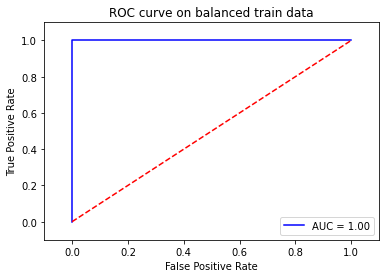

In [58]:
# Ref y_score for roc curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
y_score = fit_balanced.predict_proba(x_balanced_pruned)
y_tscore = y_score[:,1] # y_score has two value, (n_samples , n_classes), we need the second one only for roc
fpr, tpr, t = roc_curve(y_train_balanced, y_tscore, pos_label=1)

# Get AUC score
roc_auc = auc(fpr, tpr)
print('\nThe AUC score is: ', roc_auc)
# Ref plotting: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
plt.title('ROC curve on balanced train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
g = df_test_sliced.groupby('others vs bending')
balanced_test = g.apply(lambda x: x.sample(g.size().min()))
balanced_test = balanced_test.reset_index(drop=True)
balanced_test

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,others vs bending
0,24.25,45.00,37.177042,0.0,8.58,2.374208,5.50,26.75,16.531083,0.0,8.05,2.910604,7.00,25.50,19.607250,0.0,9.34,2.921729,0
1,22.00,44.67,37.058708,0.0,14.17,2.438146,6.33,24.00,16.388312,0.0,9.74,2.980688,7.50,24.25,18.125958,0.0,8.55,2.983750,0
2,32.75,47.00,42.760563,0.0,3.34,0.486167,1.50,21.00,15.036833,0.0,5.85,0.588875,1.33,21.33,15.550812,0.0,5.73,0.842271,0
3,33.33,48.00,44.334729,0.0,3.90,0.432958,0.00,18.75,11.646146,0.0,5.79,0.843063,0.00,23.00,13.443708,0.0,5.02,0.933000,0
4,37.25,45.00,40.624792,0.0,1.30,0.358604,4.00,29.50,19.040937,0.0,7.23,0.832542,27.25,38.25,34.311292,0.0,1.92,0.570583,1
5,12.75,51.00,24.562958,0.0,6.87,0.590833,0.00,25.33,19.121333,0.0,6.76,0.736771,10.67,30.00,23.493042,0.0,4.97,0.700188,1
6,38.00,45.67,42.812812,0.0,1.22,0.372438,2.00,29.50,20.096979,0.0,5.76,0.876438,27.67,38.50,33.024583,0.0,3.11,0.571083,1
7,0.00,42.75,27.464604,0.0,7.76,0.449708,7.50,35.00,20.842542,0.0,5.76,0.779917,0.00,33.00,17.617937,0.0,6.76,1.122125,1


In [60]:
x_test_balanced = balanced_test.iloc[:,:-1]
y_test_balanced = balanced_test.iloc[:,-1]
    
# predicting with pruned test sets
x_test_bpruned = results[0].transform(x_test_balanced)
y_pred = fit_balanced.predict(x_test_bpruned) # use the best model in previous section to predict on test data
print('The test accuracy of balanced data: ')
accuracy_score(y_test_balanced, y_pred)

The test accuracy of balanced data: 


1.0

## (e)

### (i)

In [61]:
# l = {1,2,...,20}
# store rfe models 'r' and train sets 'df_train_sliced' for future reference
# Use RFECV for feature selection
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
l1results = []
train_sliced2 = []
for l in range(1,21):
    print("Running l = "+str(l)+" case")
    cn = colnames_generator(l)
    df_train_sliced = pd.DataFrame()
    for d in train_data_path:
        temp_df = data_slicer(d,l,cn)
        df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
    df_train_sliced = df_train_sliced.reset_index(drop=True)
    df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
    df_train_sliced = binary_train_labels(df_train_sliced)

    x_train = df_train_sliced.iloc[:,:-1]
    y_train = df_train_sliced.iloc[:,-1]
    
    ##  normalize features
    x_train_norm = preprocessing.normalize(x_train, norm='l1')
    
    ##Repeat 1(d)iii using L1 -penalized logistic regression and cv on (l,lambda)
    clf = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear').fit(x_train_norm, y_train)
    
    train_sliced2.append(df_train_sliced)
    l1results.append(clf)
    

Running l = 1 case


/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Running l = 2 case


/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Running l = 3 case
Running l = 4 case
Running l = 5 case
Running l = 6 case
Running l = 7 case
Running l = 8 case
Running l = 9 case
Running l = 10 case
Running l = 11 case
Running l = 12 case
Running l = 13 case
Running l = 14 case
Running l = 15 case
Running l = 16 case
Running l = 17 case
Running l = 18 case
Running l = 19 case
Running l = 20 case


In [62]:
for i in range(1,21):
    print("l = ", str(i))
    print("CV Scores:", l1results[i-1].scores_[1])
    print("Mean: ", np.mean(l1results[i-1].scores_[1])) 

l =  1
CV Scores: [[0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  0.85714286 0.85714286 0.85714286 0.85714286]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  1.         1.         1.         1.        ]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  1.         1.         0.92857143 1.        ]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  1.         0.85714286 0.85714286 0.85714286]
 [0.92307692 0.92307692 0.92307692 0.92307692 0.92307692 0.92307692
  0.92307692 1.         1.         1.        ]]
Mean:  0.8992307692307692
l =  2
CV Scores: [[0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  0.85714286 0.85714286 0.85714286 0.85714286]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  1.         1.         1.         1.        ]
 [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
  1.         1.         0.92857143 0.85714286]
 [0.85714286 0.85

I got highest average cv scores when l = 1 and 3.

### (ii)

L1-penalized performed in a higher speed. But there are more parameters that needs to be research and adjust for implementing a L1-penalized then variable selection.

## (f)

### (i)

In [63]:
bending_index = [i for i, s in enumerate(train_data_path) if 'bending' in s]
cycling_index = [i for i, s in enumerate(train_data_path) if 'cycling' in s]
lying_index = [i for i, s in enumerate(train_data_path) if 'lying' in s]
sitting_index = [i for i, s in enumerate(train_data_path) if 'sitting' in s]
standing_index = [i for i, s in enumerate(train_data_path) if 'standing' in s]
walking_index = [i for i, s in enumerate(train_data_path) if 'walking' in s]

In [64]:
# create a dict for classes
label_dict={}
label_dict['bending']=1
label_dict['cycling']=2
label_dict['lying']=3
label_dict['sitting']=4
label_dict['standing']=5
label_dict['walking']=6
label_dict

{'bending': 1,
 'cycling': 2,
 'lying': 3,
 'sitting': 4,
 'standing': 5,
 'walking': 6}

In [65]:
# add labels to the new train dataset
def multi_train_labels(df1):
    labels = []
    for k in range(0,69):
        if k in bending_index:
            labels.append(1)
        elif k in cycling_index:
            labels.append(2)
        elif k in lying_index:
            labels.append(3)
        elif k in sitting_index:
            labels.append(4)
        elif k in standing_index:
            labels.append(5)
        elif k in walking_index:
            labels.append(6)
        else:
            labels.append(0)
    df1['classes'] = labels
    return df1

In [66]:
# l = {1,2,...,20}
# store rfe models 'r' and train sets 'df_train_sliced' for future reference

l1multi = []
train_sliced3 = []
for l in range(1,21):
    print("Running l = "+str(l)+" case")
    cn = colnames_generator(l)
    df_train_sliced = pd.DataFrame()
    for d in train_data_path:
        temp_df = data_slicer(d,l,cn)
        df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
    df_train_sliced = df_train_sliced.reset_index(drop=True)
    df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
    df_train_sliced = multi_train_labels(df_train_sliced)

    x_train = df_train_sliced.iloc[:,:-1]
    y_train = df_train_sliced.iloc[:,-1]
    
    ##  normalize features
    x_train_norm = preprocessing.normalize(x_train, norm='l1')
    
    ##Repeat 1(d)iii with multinomial
    clf = LogisticRegressionCV(cv=5,penalty='l1',solver='saga', multi_class='multinomial', max_iter=10000).fit(x_train_norm, y_train)
    
    train_sliced3.append(df_train_sliced)
    l1multi.append(clf)

Running l = 1 case
Running l = 2 case
Running l = 3 case
Running l = 4 case
Running l = 5 case
Running l = 6 case
Running l = 7 case
Running l = 8 case
Running l = 9 case
Running l = 10 case
Running l = 11 case
Running l = 12 case
Running l = 13 case
Running l = 14 case
Running l = 15 case
Running l = 16 case
Running l = 17 case
Running l = 18 case
Running l = 19 case
Running l = 20 case


In [67]:
for i in range(1,21):
    print("l = ", str(i))
    print("CV Scores:", l1multi[i-1].scores_[1])
    print("Max: ", np.max(l1multi[i-1].scores_[1])) 

l =  1
CV Scores: [[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.35714286
  0.85714286 0.85714286 0.78571429 0.78571429]
 [0.21428571 0.14285714 0.14285714 0.14285714 0.21428571 0.28571429
  0.71428571 0.85714286 0.85714286 0.85714286]
 [0.21428571 0.21428571 0.21428571 0.14285714 0.14285714 0.35714286
  0.64285714 0.78571429 0.92857143 0.92857143]
 [0.14285714 0.21428571 0.14285714 0.14285714 0.14285714 0.28571429
  0.71428571 0.78571429 0.78571429 0.78571429]
 [0.15384615 0.23076923 0.15384615 0.15384615 0.23076923 0.53846154
  0.76923077 0.84615385 0.84615385 0.84615385]]
Max:  0.9285714285714286
l =  2
CV Scores: [[0.14285714 0.21428571 0.21428571 0.14285714 0.21428571 0.14285714
  0.85714286 0.78571429 0.78571429 0.71428571]
 [0.21428571 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.71428571 0.92857143 0.92857143 0.92857143]
 [0.21428571 0.21428571 0.14285714 0.14285714 0.14285714 0.14285714
  0.64285714 0.71428571 0.78571429 0.78571429]
 [0.14285714 0.142

Again, choose l = 1.

In [68]:
bending_index2 = [i for i, s in enumerate(test_data_path) if 'bending' in s]
cycling_index2 = [i for i, s in enumerate(test_data_path) if 'cycling' in s]
lying_index2 = [i for i, s in enumerate(test_data_path) if 'lying' in s]
sitting_index2 = [i for i, s in enumerate(test_data_path) if 'sitting' in s]
standing_index2 = [i for i, s in enumerate(test_data_path) if 'standing' in s]
walking_index2 = [i for i, s in enumerate(test_data_path) if 'walking' in s]

In [69]:
def multi_test_labels(df1):
    labels = []
    for k in range(0,19):
        if k in bending_index2:
            labels.append(1)
        elif k in cycling_index2:
            labels.append(2)
        elif k in lying_index2:
            labels.append(3)
        elif k in sitting_index2:
            labels.append(4)
        elif k in standing_index2:
            labels.append(5)
        elif k in walking_index2:
            labels.append(6)
        else:
            labels.append(0)
    df1['classes'] = labels
    return df1

In [70]:
# get test data
cn = colnames_generator(1)
df_test_sliced = pd.DataFrame()
for d in test_data_path:
    temp_df = data_slicer(d,1,cn)
    df_test_sliced = pd.concat([df_test_sliced, temp_df])
    
df_test_sliced = df_test_sliced.reset_index(drop=True)
df_test_sliced.index = np.arange(1,len(df_test_sliced)+1)
df_test_sliced = multi_test_labels(df_test_sliced)
    
x_test = df_test_sliced.iloc[:,:-1]
y_test = df_test_sliced.iloc[:,-1]

# normalize
x_test_norm = preprocessing.normalize(x_test, norm='l1')

In [71]:
print("Test accuracy: ")
print(l1multi[0].score(x_test_norm,y_test))
print("Test error: ")
print(1-l1multi[0].score(x_test_norm,y_test))

Test accuracy: 
0.8947368421052632
Test error: 
0.10526315789473684


In [72]:
# confusion matrix
y_pred = l1multi[0].predict(x_test_norm)
confusion_matrix(y_pred, y_test)

array([[4, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 1, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 3]])

In [73]:
label_dict

{'bending': 1,
 'cycling': 2,
 'lying': 3,
 'sitting': 4,
 'standing': 5,
 'walking': 6}

Above confusion matrix shows the result of multinomial test, columns represent as in 'label_dict' respectively.

(ii)

In [74]:
# Using GuassianNB
# l = {1,2,...,20}
# store rfe models 'r' and cv scores for future reference
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

GNBre = []
GNB_cv = []
for l in range(1,21):
    print("Running l = "+str(l)+" case")
    cn = colnames_generator(l)
    df_train_sliced = pd.DataFrame()
    for d in train_data_path:
        temp_df = data_slicer(d,l,cn)
        df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
    df_train_sliced = df_train_sliced.reset_index(drop=True)
    df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
    df_train_sliced = multi_train_labels(df_train_sliced)

    x_train = df_train_sliced.iloc[:,:-1]
    y_train = df_train_sliced.iloc[:,-1]
    
    ##  normalize features
    x_train_norm = preprocessing.normalize(x_train, norm='l1')
    
    ##Repeat 1(f)i using Gaussian Naive Bayes
    GNB = GaussianNB().fit(x_train_norm, y_train)
    cv = cross_val_score(GNB, x_train_norm, y_train, cv=5)
    
    GNBre.append(GNB)
    GNB_cv.append(cv)

Running l = 1 case
Running l = 2 case
Running l = 3 case
Running l = 4 case
Running l = 5 case
Running l = 6 case
Running l = 7 case
Running l = 8 case
Running l = 9 case
Running l = 10 case
Running l = 11 case
Running l = 12 case
Running l = 13 case
Running l = 14 case
Running l = 15 case
Running l = 16 case
Running l = 17 case
Running l = 18 case
Running l = 19 case
Running l = 20 case


In [ ]:
for i in range(1,21):
    print("l = ", str(i))
    print("GNB CV Scores:", GNB_cv[i-1])
    print("Max: ", np.max(GNB_cv[i-1]))

We choose l = 1.

In [ ]:
# get test data
cn = colnames_generator(1)
df_test_sliced = pd.DataFrame()
for d in test_data_path:
    temp_df = data_slicer(d,1,cn)
    df_test_sliced = pd.concat([df_test_sliced, temp_df])
    
df_test_sliced = df_test_sliced.reset_index(drop=True)
df_test_sliced.index = np.arange(1,len(df_test_sliced)+1)
df_test_sliced = multi_test_labels(df_test_sliced)
    
x_test = df_test_sliced.iloc[:,:-1]
y_test = df_test_sliced.iloc[:,-1]

# normalize
x_test_norm = preprocessing.normalize(x_test, norm='l1')

In [ ]:
print("Test accuracy: ")
print(GNBre[0].score(x_test_norm,y_test))
print("Test error: ")
print(1-GNBre[0].score(x_test_norm,y_test))

In [ ]:
# Using MultinomialNB
# l = {1,2,...,20}
# store rfe models 'r' and cv scores for future reference

MNBre = []
MNB_cv = []
for l in range(1,21):
    print("Running l = "+str(l)+" case")
    cn = colnames_generator(l)
    df_train_sliced = pd.DataFrame()
    for d in train_data_path:
        temp_df = data_slicer(d,l,cn)
        df_train_sliced = pd.concat([df_train_sliced, temp_df])
    
    df_train_sliced = df_train_sliced.reset_index(drop=True)
    df_train_sliced.index = np.arange(1,len(df_train_sliced)+1)
    df_train_sliced = multi_train_labels(df_train_sliced)

    x_train = df_train_sliced.iloc[:,:-1]
    y_train = df_train_sliced.iloc[:,-1]
    
    ##  normalize features
    x_train_norm = preprocessing.normalize(x_train, norm='l1')
    
    ##Repeat 1(f)i using Gaussian Naive Bayes
    MNB = MultinomialNB().fit(x_train_norm, y_train)
    cv = cross_val_score(MNB, x_train_norm, y_train, cv=5)
    
    MNBre.append(MNB)
    MNB_cv.append(cv)

In [ ]:
for i in range(1,21):
    print("l = ", str(i))
    print("MultinomialNB CV Scores:", GNB_cv[i-1])
    print("Max: ", np.max(GNB_cv[i-1]))

Choose l = 1.

In [ ]:
# get test data
cn = colnames_generator(1)
df_test_sliced = pd.DataFrame()
for d in test_data_path:
    temp_df = data_slicer(d,1,cn)
    df_test_sliced = pd.concat([df_test_sliced, temp_df])
    
df_test_sliced = df_test_sliced.reset_index(drop=True)
df_test_sliced.index = np.arange(1,len(df_test_sliced)+1)
df_test_sliced = multi_test_labels(df_test_sliced)
    
x_test = df_test_sliced.iloc[:,:-1]
y_test = df_test_sliced.iloc[:,-1]

# normalize
x_test_norm = preprocessing.normalize(x_test, norm='l1')

In [ ]:
print("Test accuracy: ")
print(MNBre[0].score(x_test_norm,y_test))
print("Test error: ")
print(1-MNBre[0].score(x_test_norm,y_test))

### (iii)

Logistic regression has better accuracy, but Naive Bayes models performs a lot faster.

##  ISLR 3.7.4

a) I would expect that cubic regression to have lower RSS than linear regression. Here, we are talking about train RSS. Linear regression is optimal on test set according to the question, which may not be the best fit on train. In addition, we only have 100 data for the train. On the other hand, cubic regression tries to overfit by adding flexibility to the model.

b) Linear probably has a lower RSS than cubic regression. Because cubic is overfitting on the 100 data points and will probably perform poorly on test set

c) Cubic regression probably has a lower RSS, since it has more flexibility and true relationship is linear.

d) We do not have enough information to say which is better on test set since we do not know how far the real relationship from linear. In this case, either linear or non-linear could be the answer  


## ISLR 4.7.7

Using Baye's Theorem:

Suppose Y is outcome "Yes" on prediction, N is outcome "No".Then by Baye's Theorem:

P(Y|X=4) = P(X=4|Y)P(Y)/(P(X=4|Y)P(Y)+P(X=4|N)P(N))

Then use the pdf of normal distribution f(x) and plug in values:

P(Y|X=4) = 0.8exp(-(1/2**36)*(4-10)^2) / 0.8(exp(-(1/2**36)*(4-10)^2)+0.2exp(-(1/2*36)*(4-10)^2)

= 0.752